# Problem Statement:
  Build a neural network that can classify images of handwritten digits (0 to 9) from the MNIST dataset.
  

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [9]:
# Import dataset
df = pd.read_csv('mnist_digits_8x8.csv')

print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  label  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]


In [10]:
# preprocess data(Normalization)
X = df.drop('label', axis=1).values
y = df['label'].values
X = X / 16.0  # Normalize pixel values to [0, 1]



In [11]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
# Build a MLP model

mlp = MLPClassifier(hidden_layer_sizes=(32, 164), max_iter=1000, random_state=42) # # Two layers: 32 neurons, then 164 neurons
# Train the model
mlp.fit(X_train, y_train)

accuracy = mlp.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')


Model accuracy: 0.98


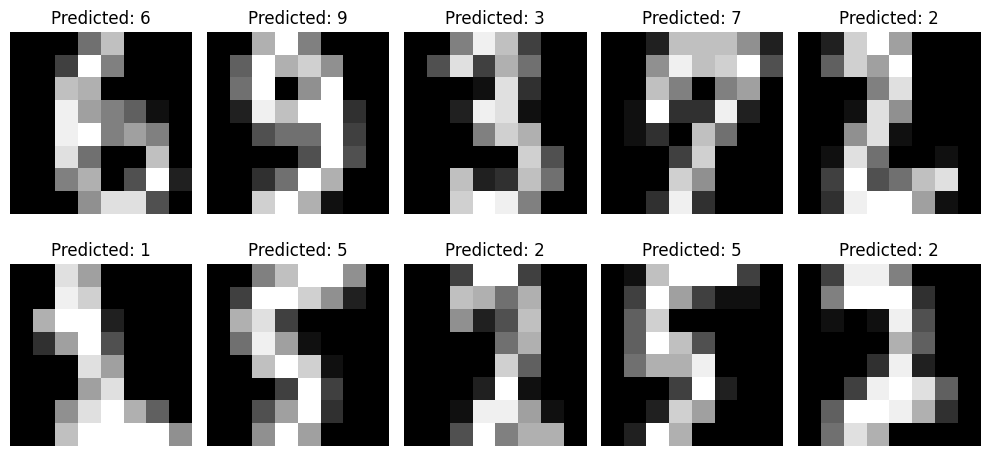

In [30]:
# Visualize some predictions
predictions = mlp.predict(X_test)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Predicted: {predictions[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()  

